# Distortion

In [1]:
# Setup
from scipy.io import wavfile
import numpy as np
import sounddevice as sd
import soundfile as sf
import matplotlib.pyplot as plt
from scipy import signal
import sys
import requests
import io

# URL of the raw wave file on GitHub
# un-comment the URL of the file you want to use
# ATF Drums
#github_url = "https://raw.githubusercontent.com/kevbrnen/Music-Technology-Final-Project/main/Sound%20Examples/Testing_Files/Around%20the%20fur%20drums.wav"
# KYW inst
#github_url = "https://raw.githubusercontent.com/kevbrnen/Music-Technology-Final-Project/main/Sound%20Examples/Testing_Files/KYW%20Inst.wav"

# # Fetch the wave file from GitHub
# response = requests.get(github_url)

# # Check if the request was successful
# if response.status_code == 200:
#     # Read the wave data from the response content
#     wave_data = io.BytesIO(response.content)
    
#     # Read the wave file 
#     fs, data = wavfile.read(wave_data)
    
# else:
#     print("Failed to fetch the wave file from GitHub")


fs, data = wavfile.read("/Users/kevinbrennan/Desktop/Final_Project/Music-Technology-Final-Project/Sound Examples/Testing_Files/Guitar.wav")

# Get the bit depth of the audio data (assumes audio_data is a NumPy array)
bit_depth = data.dtype.itemsize * 8

# Calculate the scaling factor for normalization
scaling_factor = 2 ** (bit_depth - 1)  # For signed audio

# Convert audio data to floating-point values and normalize
data = data.astype(np.float32) / scaling_factor

# Verify that the data is now in the range -1 to 1
print(f"Min Value: {np.min(data)}")
print(f"Max Value: {np.max(data)}")

Min Value: -1.0
Max Value: 0.9999998807907104


### Clipping Distortion

In [2]:
Clipping_out = np.zeros((len(data), 2))
dist_gain = 10

data = data*dist_gain

for i in range(len(data)):
    for j in range(2):
        if(data[i, j] <=-1):
            Clipping_out[i, j] = -1

        elif(-1 <= data[i, j] and data[i, j] <=1):
            Clipping_out[i, j] = data[i, j]

        elif(data[i, j] >= 1):
            Clipping_out[i, j] = 1

In [3]:
sd.play(Clipping_out, fs)

In [11]:
#sf.write("clip.wav", Clipping_out, fs)

Text(0.5, 1.0, 'Clipping Distortion Output')

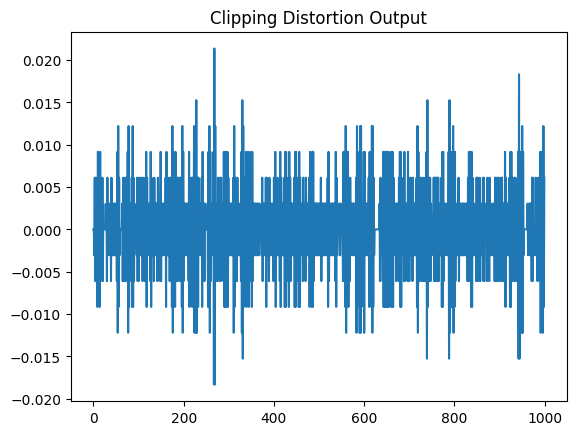

In [5]:
plt.plot(Clipping_out[1000:2000, 0])
plt.title("Clipping Distortion Output")

### Square Distortion

In [4]:
Square_out = np.zeros((len(data), 2))

for i in range(len(data)):
    for j in range(2):
        if(data[i, j] < 0):
            Square_out[i, j] = -1

        elif(data[i, j] >= 0):
            Square_out[i, j] = 1


In [5]:
sd.play(Square_out,fs)

In [12]:
#sf.write("square.wav", Square_out, fs)

Text(0.5, 1.0, 'Square Distortion Output')

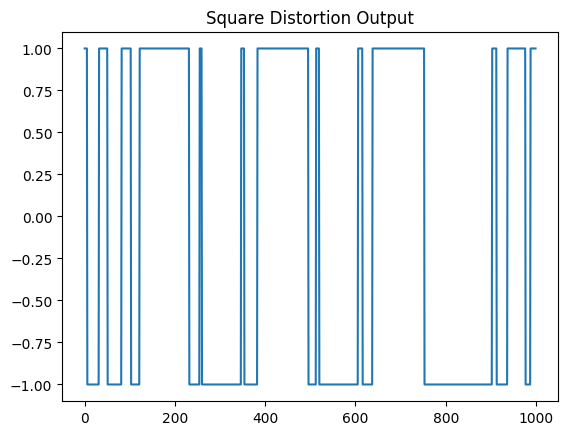

In [6]:
plt.plot(Square_out[1000:2000, 0])
plt.title("Square Distortion Output")

### Soft Cube Clipping Distortion

In [7]:
Cube_out = np.zeros((len(data), 2))

for i in range(len(data)):
    for j in range(2):
        if(data[i, j] <=-1):
            Cube_out[i, j] = -(2/3)

        elif(-1 <= data[i, j] and data[i, j] <=1):
            Cube_out[i, j] = data[i, j] - (data[i, j]**3/3)

        elif(data[i, j] >= 1):
            Cube_out[i, j] = 1

In [8]:
sd.play(Cube_out, fs)

In [13]:
#sf.write("cube.wav", Cube_out, fs)

Text(0.5, 1.0, 'Soft Cube Distortion Output')

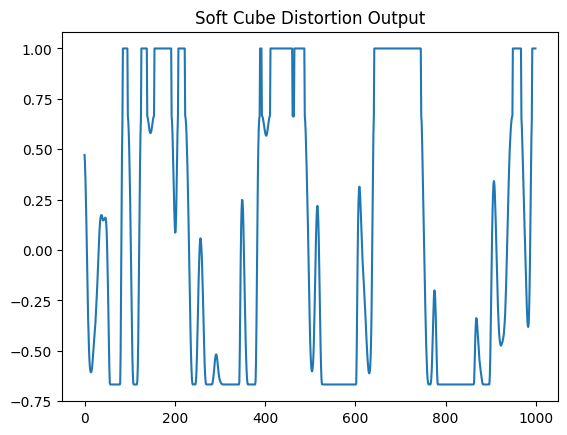

In [8]:
plt.plot(Cube_out[1000:2000, 0])
plt.title("Soft Cube Distortion Output")

### Tanh Distortion

In [9]:
tanh_out = np.zeros((len(data), 2))

for i in range(len(data)):
    for j in range(2):
        tanh_out[i, j] = np.tanh(data[i, j])

In [10]:
sd.play(tanh_out, fs)

In [14]:
#sf.write("tanh.wav", tanh_out, fs)

Text(0.5, 1.0, 'tanh() Distortion Output')

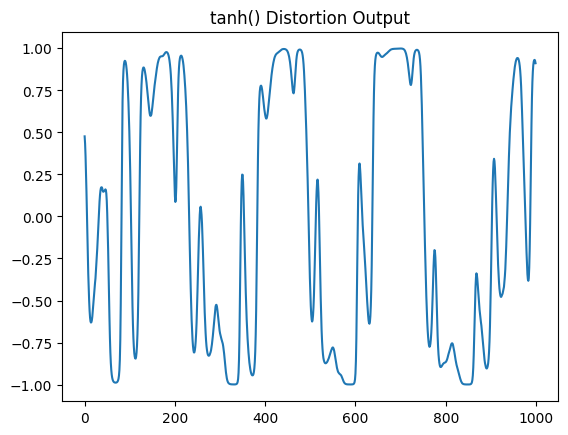

In [10]:
plt.plot(tanh_out[1000:2000, 0])
plt.title("tanh() Distortion Output")

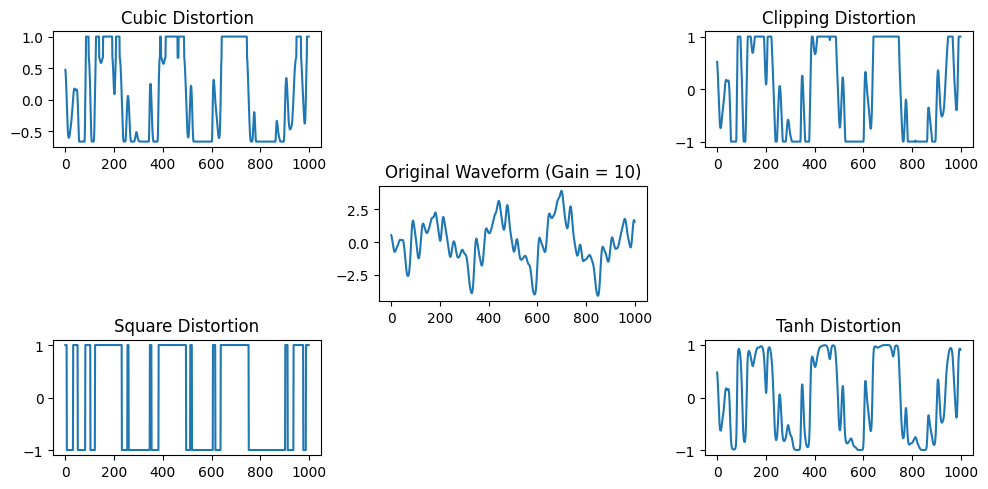

In [64]:
fig = plt.figure(figsize=(10, 5))

# Add subplots to the figure
ax1 = fig.add_subplot(3, 3, 5)  # Centered
ax2 = fig.add_subplot(3, 3, 1)  # Above centered
ax3 = fig.add_subplot(3, 3, 3)  # Above centered
ax4 = fig.add_subplot(3, 3, 7)  # Beside centered
ax5 = fig.add_subplot(3, 3, 9) 

# Plot each waveform on its respective subplot
ax1.plot(data[1000:2000, 0])
ax1.set_title('Original Waveform (Gain = 10)')

ax2.plot(Cube_out[1000:2000, 0])
ax2.set_title('Cubic Distortion')

ax3.plot(Clipping_out[1000:2000, 0])
ax3.set_title('Clipping Distortion')

ax4.plot(Square_out[1000:2000, 0])
ax4.set_title('Square Distortion')

ax5.plot(tanh_out[1000:2000, 0])
ax5.set_title('Tanh Distortion')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()